In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Demo for ε-Differential Agreements

This demo aims to demonstrate how the ε-Differential Agreements in Seele's Neural Consensus Algorithm works. A lot of potential real-world issues have been greatly simplified such as faulty or unresponsive nodes. In addition, some more sophisticated factors that were not described in detail in the article, such as confidence percentage, varying sampling ratios, or decision making from multiple samples have not been considered. 

You can play around with all the customizable parameters immediately below; keep in mind that setting a very large sampling ratio or number of nodes may greatly increase compute time.

## Customizable Parameters: Play Around with These!

In [137]:
# Number of nodes in the network
num_nodes = 1000
# Correct order of transactions
order = [0.1, 0.21, 0.27, 0.34, 0.5, 0.55, 0.59, 0.76, 0.82, 0.9]
# Standard deviation of Gaussian noise
noise = 0.3
# Colors
colors = cm.rainbow(np.linspace(0, 1, len(order))) #colors for scatter plots
# Sampling ratio s
s = 0.03 
# Aggregation method
aggregator = np.median

## Data Generation

In [138]:
#Creates correct table and generates noise. Columns are the different nodes, rows are the different transactions.
ledger = pd.DataFrame(index = order, data = order)
for i in range(num_nodes):
    ledger[i] = [value + np.random.normal(0, noise) for value in order]
ledger

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0.10,-0.211011,0.312307,0.176223,0.060840,0.371101,0.245134,0.071129,-0.388777,0.665311,0.045768,...,0.137275,0.027455,0.404718,0.186304,0.339448,0.057946,-0.088760,0.388787,0.199797,0.172094
0.21,0.653159,0.331953,0.342209,-0.091572,0.504883,0.098849,0.042544,-0.052802,0.070345,0.277829,...,0.334111,-0.258634,0.595801,0.000461,0.496673,0.467483,0.143876,0.345053,0.589065,0.226897
0.27,0.086508,-0.315525,-0.385991,0.002771,0.373293,0.157552,0.019392,-0.207838,-0.337085,0.795757,...,0.449971,0.759792,-0.166938,0.413577,0.331247,0.723265,-0.229440,0.351174,0.070715,0.069692
0.34,-0.283578,0.153136,0.096771,0.137972,0.542598,0.467806,0.278515,-0.079874,0.603850,0.418623,...,0.482923,0.449355,-0.270952,0.435996,0.363581,-0.099759,0.379077,0.147779,0.861437,0.066534
0.50,0.848531,0.137488,0.153500,1.310658,0.249923,0.029351,0.823060,0.226009,0.073103,0.409473,...,0.424365,1.043265,1.216428,0.790085,0.551966,0.097598,1.078359,0.924267,0.693845,0.820374
0.55,0.597674,0.686194,0.903421,-0.010387,0.283889,0.256877,0.079531,0.342461,0.132268,0.854404,...,0.649899,0.698708,0.071963,0.769369,0.930578,1.038257,0.606114,0.471810,0.884975,0.272742
0.59,0.473130,0.298688,0.696705,0.508414,0.193406,0.427386,0.981371,0.065581,0.789924,0.843488,...,0.333302,0.574817,0.916776,0.829510,0.809934,0.165098,0.715572,0.727138,0.301655,0.401372
0.76,1.092155,0.855411,0.470405,0.537424,0.419145,0.889510,0.959871,1.266370,0.791533,0.751042,...,0.512454,0.956189,0.174215,0.929901,0.674855,0.755323,1.017184,0.986681,0.565641,0.811005
0.82,0.505950,1.179478,0.909832,1.096872,0.236828,1.032961,0.487164,0.888858,0.823877,1.156392,...,1.178859,0.476374,1.177049,0.562947,0.853146,0.765647,1.845610,0.520320,1.026064,1.113667
0.90,1.014029,1.256135,0.612155,0.896343,1.227118,0.477301,1.104304,0.795241,1.629383,0.376225,...,1.163129,0.422991,0.436951,1.024308,0.645070,0.810492,0.722086,0.966879,1.226773,1.248761


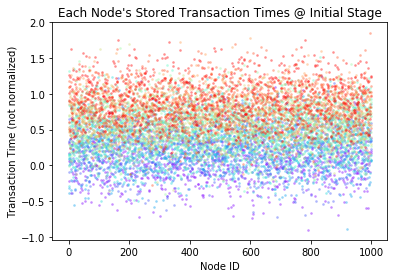

In [139]:
values = []
for name, row in ledger.iterrows():
    values += [row]
    
for txn, color in zip(values, colors):
    plt.scatter(x = ledger.columns, y = txn, alpha = 0.3, c = color, s=3)
plt.xlabel("Node ID")
plt.ylabel("Transaction Time (not normalized)")
plt.title("Each Node's Stored Transaction Times @ Initial Stage")

#calculates epsilon for each transaction
ranges_init = [np.ptp(row) for name, row in ledger.iterrows()]

## Round 1

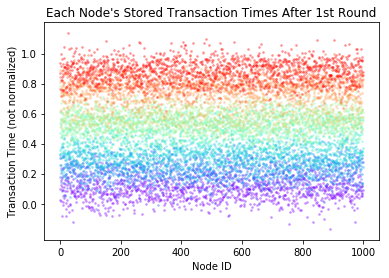

In [140]:
# Round 1 of EDA
to_update = []
for node in ledger.columns:
    sampled_nodes = np.random.choice(ledger.columns, int(s * len(ledger.columns)))
    samples = [[] for i in range(len(order))]
    for sample in sampled_nodes:
        for (index, val) in zip(order, samples):
            val += [ledger.loc[index, sample]]
    new_values = [aggregator(l) for l in samples]
    to_update += [new_values]

for node, new_val in zip(ledger.columns, to_update):
    ledger[node] = new_val

values = []
for name, row in ledger.iterrows():
    values += [row]
    
for txn, color in zip(values, colors):
    plt.scatter(x = ledger.columns, y = txn, alpha = 0.3, c = color, s=3)
plt.xlabel("Node ID")
plt.ylabel("Transaction Time (not normalized)")
plt.title("Each Node's Stored Transaction Times After 1st Round")
plt.yticks(np.arange(0,1.2,0.2))

#calculates epsilon for each transaction
ranges_round1 = [np.ptp(row) for name, row in ledger.iterrows()]

## Round 2

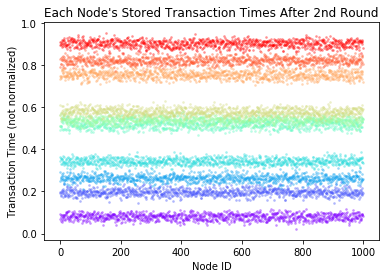

In [141]:
to_update = []
for node in ledger.columns:
    sampled_nodes = np.random.choice(ledger.columns, int(s * len(ledger.columns)))
    samples = [[] for i in range(len(order))]
    for sample in sampled_nodes:
        for (index, val) in zip(order, samples):
            val += [ledger.loc[index, sample]]
    new_values = [aggregator(l) for l in samples]
    to_update += [new_values]

for node, new_val in zip(ledger.columns, to_update):
    ledger[node] = new_val

values = []
for name, row in ledger.iterrows():
    values += [row]
    
for txn, color in zip(values, colors):
    plt.scatter(x = ledger.columns, y = txn, alpha = 0.3, c = color, s=3)
plt.xlabel("Node ID")
plt.ylabel("Transaction Time (not normalized)")
plt.title("Each Node's Stored Transaction Times After 2nd Round")

#calculates epsilon for each transaction
ranges_round2 = [np.ptp(row) for name, row in ledger.iterrows()]

## Round 3

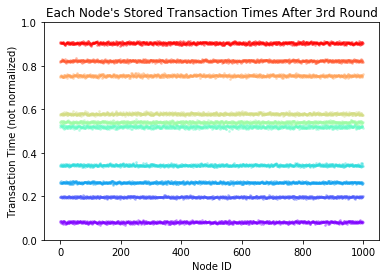

In [142]:
to_update = []
for node in ledger.columns:
    sampled_nodes = np.random.choice(ledger.columns, int(s * len(ledger.columns)))
    samples = [[] for i in range(len(order))]
    for sample in sampled_nodes:
        for (index, val) in zip(order, samples):
            val += [ledger.loc[index, sample]]
    new_values = [aggregator(l) for l in samples]
    to_update += [new_values]

for node, new_val in zip(ledger.columns, to_update):
    ledger[node] = new_val

values = []
for name, row in ledger.iterrows():
    values += [row]
    
for txn, color in zip(values, colors):
    plt.scatter(x = ledger.columns, y = txn, alpha = 0.3, c = color, s=3)
plt.xlabel("Node ID")
plt.ylabel("Transaction Time (not normalized)")
plt.title("Each Node's Stored Transaction Times After 3rd Round")
plt.yticks(np.arange(0,1.2,0.2))

#calculates epsilon for each transaction
ranges_round3 = [np.ptp(row) for name, row in ledger.iterrows()]

## Round 4

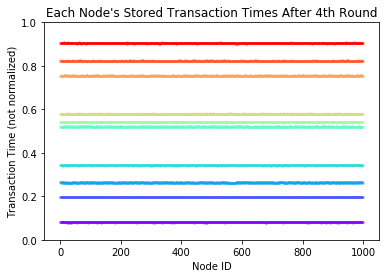

In [143]:
to_update = []
for node in ledger.columns:
    sampled_nodes = np.random.choice(ledger.columns, int(s * len(ledger.columns)))
    samples = [[] for i in range(len(order))]
    for sample in sampled_nodes:
        for (index, val) in zip(order, samples):
            val += [ledger.loc[index, sample]]
    new_values = [aggregator(l) for l in samples]
    to_update += [new_values]

for node, new_val in zip(ledger.columns, to_update):
    ledger[node] = new_val

values = []
for name, row in ledger.iterrows():
    values += [row]
    
for txn, color in zip(values, colors):
    plt.scatter(x = ledger.columns, y = txn, alpha = 0.3, c = color, s=3)
plt.xlabel("Node ID")
plt.ylabel("Transaction Time (not normalized)")
plt.title("Each Node's Stored Transaction Times After 4th Round")
plt.yticks(np.arange(0,1.2,0.2))

#calculates epsilon for each transaction
ranges_round4 = [np.ptp(row) for name, row in ledger.iterrows()]

## ε Over the Rounds

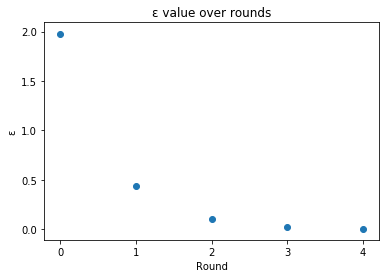

In [144]:
epsilons = pd.DataFrame(data = {0: ranges_init, 1: ranges_round1, 2: ranges_round2, 3: ranges_round3, 4: ranges_round4})
means = []
for col in epsilons.columns:
    means += [np.mean(epsilons[col])]

plt.scatter(x=[0,1,2,3,4], y=means)
plt.xlabel("Round")
plt.ylabel("ε")
plt.xticks(np.arange(0, 5))
plt.yticks(np.arange(0, 2.1, 0.5))
plt.title("ε value over rounds")
plt.show()

In [145]:
#Worst case epsilons
worst_differences = []
for index, (name, row) in zip(range(ledger.shape[0]), ledger.iterrows()):
    actual = order[index]
    worst_differences += [max(abs(row - actual))]
max(worst_differences)

0.023945588271412688